In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, uniform, expon
from scipy.stats import laplace
from utils.queue.regular_process import interarrival_times, service_times, INITIAL_VALUE, EXPECTED_INTERARRIVAL_TIME, EXPECTED_SERVICE_TIME
from utils.queue.anomalies import deterministic_geometric_arrivals
from utils.simulate_markov import simulate_positive_recurrent_modulated_random_walk, simulate_lindley_process
from utils.kernel_estimation import nadaraya_watson_marginal_pdf, nadaraya_watson_marginal_cdf, nadaraya_watson_marginal_cdf_direct, nadaraya_watson_average_marginal_cdf, nadaraya_watson_average_marginal_cdf_direct, nadaraya_watson_average_marginal_pdf, queuing_model_marginal_cdf, queuing_model_average_marginal_cdf
from utils.simulate_markov import simulate_ar1_process, NORMAL_NOISE, UNIFORM_NOISE

In [2]:
# Set up the Seaborn style
sns.set(style="whitegrid")

In [3]:
# Fix the random seed for reproducibility 
random_seed = 7

In [4]:
# Number of steps on each trajectory
n_steps = 200
# Number of normal trajectories to simulate
M = 100
# Number of anomalous trajectories to simulate
A = 100

In [5]:
trajectory = simulate_positive_recurrent_modulated_random_walk(n_steps=n_steps, num_processes=1, seed=random_seed)[0]

In [6]:
x=1

In [16]:
marginal_pdf = nadaraya_watson_marginal_pdf(data=trajectory, x=x)
marginal_cdf = nadaraya_watson_marginal_cdf(data=trajectory, x=x)
marginal_cdf_direct = nadaraya_watson_marginal_cdf_direct(data=trajectory, x=x)
marginal_cdf_queuing = queuing_model_marginal_cdf(data=trajectory, x=x)


In [19]:
marginal_cdf(1)

0.6847892739151361

In [20]:
marginal_cdf_queuing(1)

0.6847892739151361

In [9]:
def get_true_dist(x):
    def _dist(y):
        result = np.zeros_like(y, dtype=float)
        result[y < 0] = 0
        result[y == 0] = expon.cdf(-x)
        result[y > 0] = 0.5 * expon.pdf((x - y[y > 0] + 1) / 2)
        return result
    return _dist

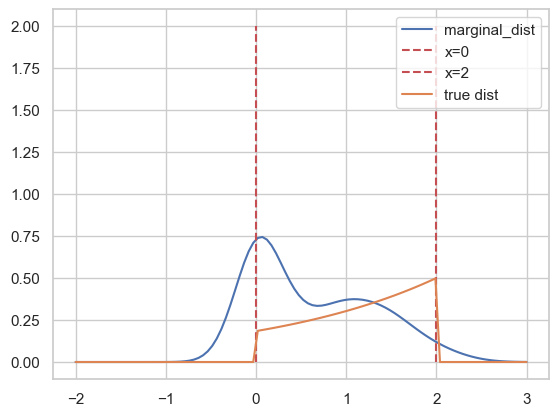

In [10]:
t_values = np.linspace(-2, 3, 100)
# Compute the values of the function for each x value
y_values = np.array([marginal_pdf(t) for t in t_values])
true_dist = get_true_dist(x)
true_values = true_dist(t_values)
plt.plot(t_values, y_values, label='marginal_dist')
plt.vlines(x=0, ymin=0, ymax=2, colors='r', linestyles='--', label='x=0')
plt.vlines(x=1+x, ymin=0, ymax=2, colors='r', linestyles='--', label=f'x={1+x}')
# plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, true_values, label=f'true dist')
plt.legend()

In [11]:
# Define the piecewise function
def piecewise_function(y):
    result = np.zeros_like(y, dtype=float)
    result[y < 0] = 0
    result[(y >= 0) & (y <= 2)] = np.exp(-((2 - y[(y >= 0) & (y <= 2)]) / 2))
    result[y > 2] = 1
    return result


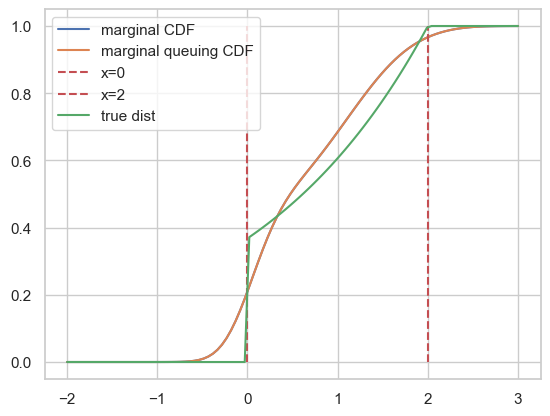

In [21]:
t_values = np.linspace(-2, 3, 100)
# Compute the values of the function for each x value
y_values = np.array([marginal_cdf(t) for t in t_values])
yy_values = np.array([marginal_cdf_queuing(t) for t in t_values])
# true_dist = get_true_dist(x)
true_values = piecewise_function(t_values)
plt.plot(t_values, y_values, label='marginal CDF')
plt.plot(t_values, yy_values, label='marginal queuing CDF')
plt.vlines(x=0, ymin=0, ymax=1, colors='r', linestyles='--', label='x=0')
plt.vlines(x=1+x, ymin=0, ymax=1, colors='r', linestyles='--', label=f'x={1+x}')
# plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, true_values, label=f'true dist')
plt.legend()

In [13]:
marginal_cdf(0)

0.21042264640736813

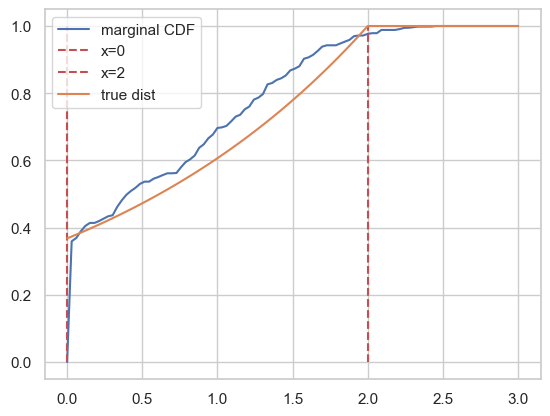

In [14]:
t_values = np.linspace(0, 3, 100)
# Compute the values of the function for each x value
y_values = np.array([marginal_cdf_direct(t) for t in t_values])
# true_dist = get_true_dist(x)
true_values = piecewise_function(t_values)
plt.plot(t_values, y_values, label='marginal CDF')
plt.vlines(x=0, ymin=0, ymax=1, colors='r', linestyles='--', label='x=0')
plt.vlines(x=1+x, ymin=0, ymax=1, colors='r', linestyles='--', label=f'x={1+x}')
# plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, true_values, label=f'true dist')
plt.legend()

In [43]:
def estimation(t):
    counter = 0
    for i in range(len(trajectory)-1):
        if trajectory[i+1]>0 and (trajectory[i+1]-trajectory[i])<=t:
            counter+=1
        if trajectory[i+1]<=0:
            counter+=1
        
    return counter/(len(trajectory)-1)

In [16]:
estimation(0)

0.5975975975975976

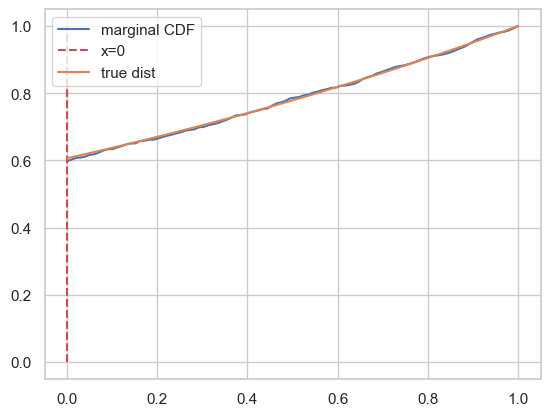

In [17]:
t_values = np.linspace(0, 1, 100)
# Compute the values of the function for each x value
y_values = np.array([estimation(t) for t in t_values])
# true_dist = get_true_dist(x)
true_values = np.exp(-(1-t_values)/2)
plt.plot(t_values, y_values, label='marginal CDF')
plt.vlines(x=0, ymin=0, ymax=1, colors='r', linestyles='--', label='x=0')
# plt.vlines(x=1+x, ymin=0, ymax=1, colors='r', linestyles='--', label=f'x={1+x}')
# plt.plot(t_values, yy_values, label='average_marginal_dist')
plt.plot(t_values, true_values, label=f'true dist')
plt.legend()

In [7]:
trajectory = simulate_lindley_process(n_steps=n_steps, num_processes=1, initial_value=INITIAL_VALUE, interarrival_times=interarrival_times, service_times=service_times, seed=random_seed)[0]

In [8]:
np.max(trajectory)

8.71473881668079

In [9]:
x=7

In [10]:
marginal_pdf = nadaraya_watson_marginal_pdf(data=trajectory, x=x)
marginal_cdf = nadaraya_watson_marginal_cdf(data=trajectory, x=x)
marginal_cdf_direct = nadaraya_watson_marginal_cdf_direct(data=trajectory, x=x)

In [11]:
def estimation(t, _trajectory):
    counter = np.sum((_trajectory[1:] > 0) & (_trajectory[1:] - _trajectory[:-1] <= t)) + np.sum(_trajectory[1:] <= 0)
    return counter / (len(_trajectory) - 1)


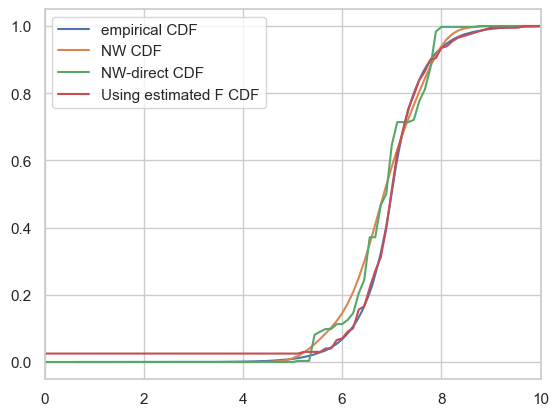

In [12]:
t_values = np.linspace(-1, x+3, 100)
# Compute the values of the function for each x value
y_values = np.array([marginal_cdf(t) for t in t_values])
yy_values = np.array([marginal_cdf_direct(t) for t in t_values])
yyy_values = np.array([estimation(t-x, trajectory) for t in t_values])

data = service_times(size=10**5, random_state=random_seed+2) - interarrival_times(size=10**5, random_state=random_seed+1)+x
sorted_data = np.sort(data)
ecdf = np.arange(1, len(data)+1) / len(data)
plt.plot(sorted_data, ecdf, label='empirical CDF')


# true_dist = get_true_dist(x)
# true_values = piecewise_function(t_values)
plt.plot(t_values, y_values, label='NW CDF')
plt.plot(t_values, yy_values, label='NW-direct CDF')
plt.plot(t_values, yyy_values, label='Using estimated F CDF')
plt.xlim(0,x+3)
# plt.vlines(x=0, ymin=0, ymax=1, colors='r', linestyles='--', label='x=0')
# plt.vlines(x=1+x, ymin=0, ymax=1, colors='r', linestyles='--', label=f'x={1+x}')
# plt.plot(t_values, yy_values, label='average_marginal_dist')
# plt.plot(t_values, true_values, label=f'true dist')
plt.legend()

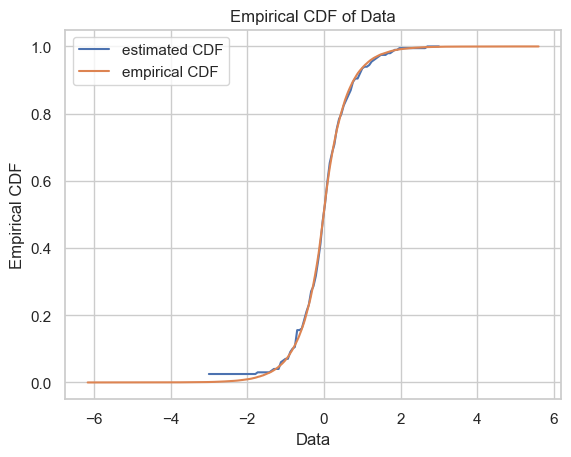

In [13]:
random_seed+=1
t_values = np.linspace(-3, 3, 100)
plt.plot(t_values, [estimation(t, _trajectory=trajectory) for t in t_values], label='estimated CDF')
data = service_times(size=10**5, random_state=random_seed+2) - interarrival_times(size=10**5, random_state=random_seed+1)
sorted_data = np.sort(data)
ecdf = np.arange(1, len(data)+1) / len(data)
plt.plot(sorted_data, ecdf, label='empirical CDF')
plt.xlabel('Data')
# plt.xlim(0,3.3)
# plt.ylim(0.65,1)
plt.ylabel('Empirical CDF')
plt.title('Empirical CDF of Data')
plt.legend()

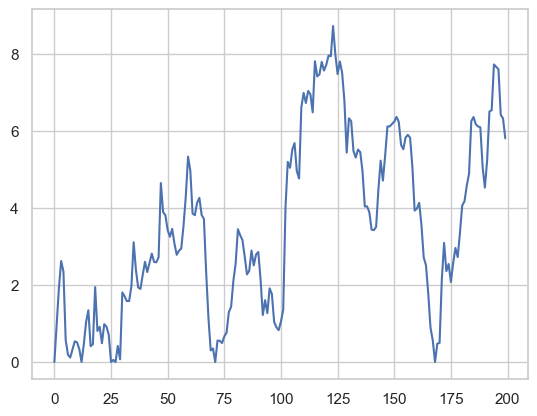

In [14]:
plt.plot(trajectory)

In [17]:
deterministic_geometric_arrivals(5)

array([0.5    , 0.25   , 0.125  , 0.0625 , 0.03125])

In [19]:
deterministic_geometric_arrivals((5,8))

array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.125     , 0.125     , 0.125     ,
        0.125     , 0.125     , 0.0625    ],
       [0.0625    , 0.0625    , 0.0625    , 0.0625    , 0.03125   ,
        0.03125   , 0.03125   , 0.03125   ],
       [0.03125   , 0.015625  , 0.015625  , 0.015625  , 0.015625  ,
        0.015625  , 0.0078125 , 0.0078125 ],
       [0.0078125 , 0.0078125 , 0.0078125 , 0.00390625, 0.00390625,
        0.00390625, 0.00390625, 0.00390625]])

In [20]:
size = (5,8)

In [24]:
row = np.array([0.5 ** (i + 1) for i in range(size[1])])
np.repeat(row, size[1]).reshape(size)

ValueError: cannot reshape array of size 64 into shape (5,8)

In [25]:
row = np.array([0.5 ** (i + 1) for i in range(size[1])])

In [26]:
row

array([0.5       , 0.25      , 0.125     , 0.0625    , 0.03125   ,
       0.015625  , 0.0078125 , 0.00390625])

In [30]:
np.repeat(row, size[1])

array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.125     , 0.125     , 0.125     , 0.125     ,
       0.125     , 0.125     , 0.125     , 0.125     , 0.0625    ,
       0.0625    , 0.0625    , 0.0625    , 0.0625    , 0.0625    ,
       0.0625    , 0.0625    , 0.03125   , 0.03125   , 0.03125   ,
       0.03125   , 0.03125   , 0.03125   , 0.03125   , 0.03125   ,
       0.015625  , 0.015625  , 0.015625  , 0.015625  , 0.015625  ,
       0.015625  , 0.015625  , 0.015625  , 0.0078125 , 0.0078125 ,
       0.0078125 , 0.0078125 , 0.0078125 , 0.0078125 , 0.0078125 ,
       0.0078125 , 0.00390625, 0.00390625, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00390625, 0.00390625])

In [32]:
np.array(
            [[0.5 ** (i + 1) for i in range(size[0])] for _ in range(size[1])]
        )

array([[0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125]])

In [38]:
p=0.5
np.array([p ** (np.arange(1, size[0] + 1)) for _ in range(size[1])])

array([[0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125],
       [0.5    , 0.25   , 0.125  , 0.0625 , 0.03125]])

In [42]:
np.array([p ** (np.arange(1, size[1] + 1)) for _ in range(size[0])])

array([[0.5       , 0.25      , 0.125     , 0.0625    , 0.03125   ,
        0.015625  , 0.0078125 , 0.00390625],
       [0.5       , 0.25      , 0.125     , 0.0625    , 0.03125   ,
        0.015625  , 0.0078125 , 0.00390625],
       [0.5       , 0.25      , 0.125     , 0.0625    , 0.03125   ,
        0.015625  , 0.0078125 , 0.00390625],
       [0.5       , 0.25      , 0.125     , 0.0625    , 0.03125   ,
        0.015625  , 0.0078125 , 0.00390625],
       [0.5       , 0.25      , 0.125     , 0.0625    , 0.03125   ,
        0.015625  , 0.0078125 , 0.00390625]])

In [41]:
size

(5, 8)